In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [ ]:
# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = X.T # Shape (2, 1000)
y = y.reshape(1, -1) # Shape (1, 1000)

In [ ]:
# Initialize parameters
def initialize_parameters():
 np.random.seed(42)
 W1 = np.random.randn(2, 2) * np.sqrt(2 / 2) # He initialization
 b1 = np.zeros((2, 1))
 W2 = np.random.randn(1, 2) * 0.01
 b2 = np.zeros((1, 1))
 return W1, b1, W2, b2

In [ ]:
# Activation functions
def relu(Z):
 return np.maximum(0, Z)
def sigmoid(Z):
 return 1 / (1 + np.exp(-Z))

In [ ]:
# Forward propagation
def forward_prop(X, W1, b1, W2, b2):
 Z1 = W1.dot(X) + b1
 A1 = relu(Z1)
 Z2 = W2.dot(A1) + b2
 A2 = sigmoid(Z2)
 return Z1, A1, Z2, A2

In [ ]:
# Loss calculation
def compute_loss(A2, Y):
 m = Y.shape[1]
 return -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))

In [ ]:
# Backward propagation
def backward_prop(X, Y, Z1, A1, A2, W2):
 m = Y.shape[1]
 dZ2 = A2 - Y
 dW2 = (1 / m) * dZ2.dot(A1.T)
 db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
 dA1 = W2.T.dot(dZ2)
 dZ1 = dA1 * (Z1 > 0) # ReLU derivative
 dW1 = (1 / m) * dZ1.dot(X.T)
 db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
 return dW1, db1, dW2, db2

Final Weights and Biases:
W1: [[ 0.86348023 -0.71881649]
 [ 0.10289111  2.09922056]]
b1: [[1.36254786]
 [1.09390548]]
W2: [[ 1.6901602  -1.69729591]]
b2: [[0.04699148]]
Final Error (Loss): 0.2857247976987769


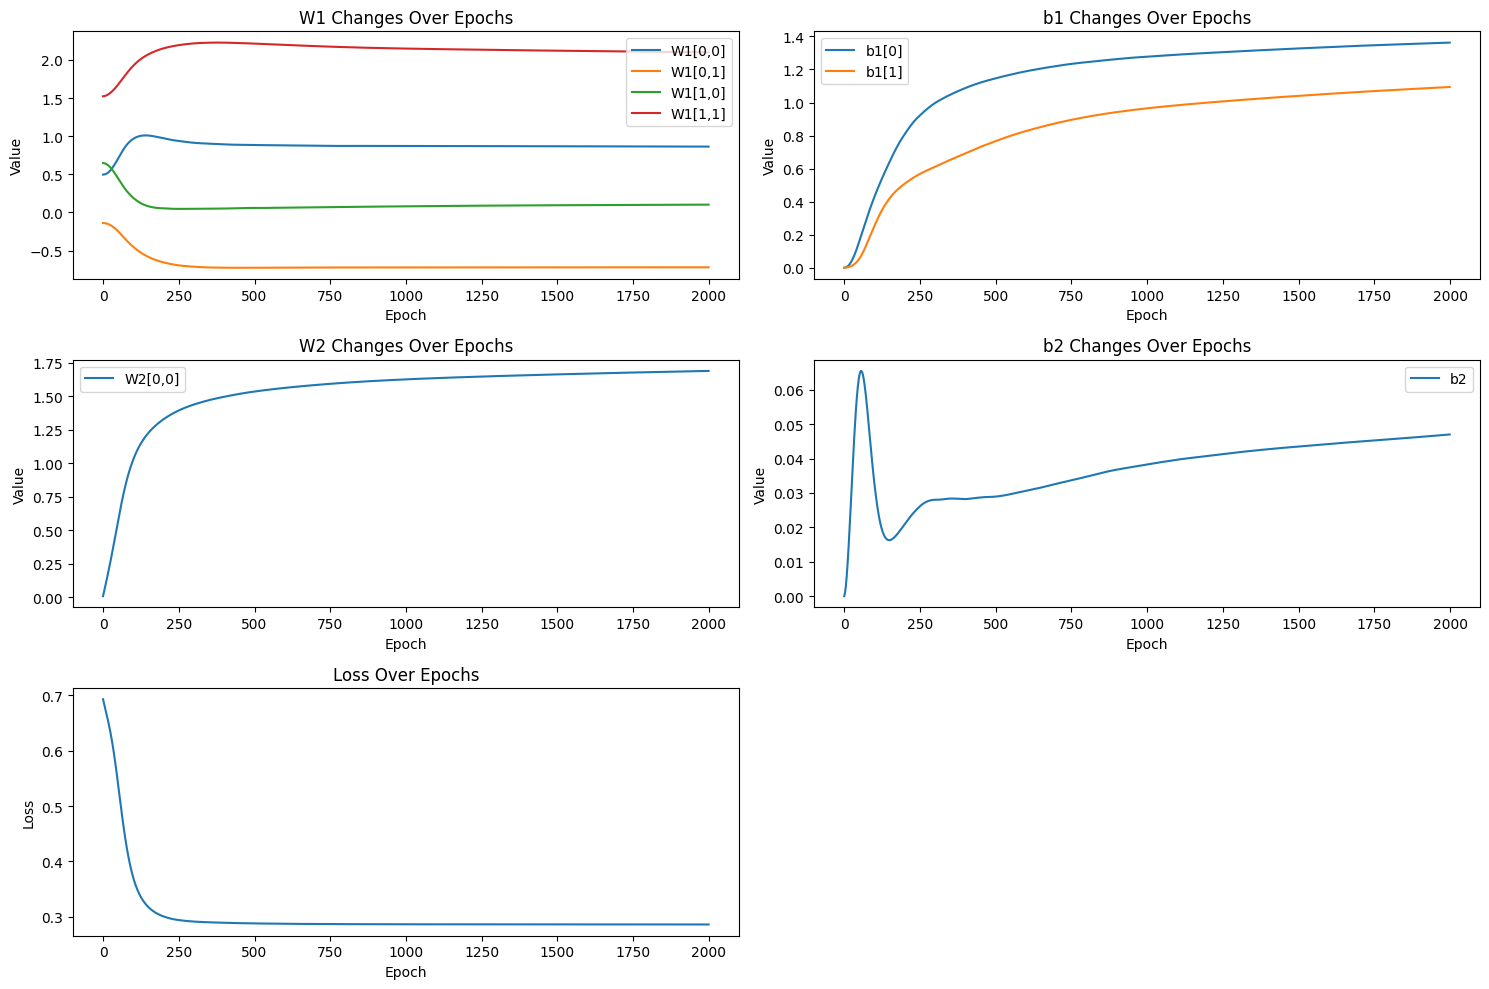

In [ ]:
# Training parameters
epochs = 2000
learning_rate = 0.1
W1, b1, W2, b2 = initialize_parameters()

# Lists to store parameter and error changes
W1_history, b1_history = [], []
W2_history, b2_history = [], []
loss_history = []

# Training loop
for i in range(epochs):
 # Forward propagation
 Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)

 # Compute loss
 loss = compute_loss(A2, y)
 loss_history.append(loss)

 # Backward propagation
 dW1, db1, dW2, db2 = backward_prop(X, y, Z1, A1, A2, W2)

 # Update parameters
 W1 -= learning_rate * dW1
 b1 -= learning_rate * db1
 W2 -= learning_rate * dW2
 b2 -= learning_rate * db2

 # Store parameter values
 W1_history.append(W1.copy())
 b1_history.append(b1.copy())
 W2_history.append(W2.copy())
 b2_history.append(b2.copy())

# Convert lists to numpy arrays for easier plotting
W1_history = np.array(W1_history)
b1_history = np.array(b1_history)
W2_history = np.array(W2_history)
b2_history = np.array(b2_history)
loss_history = np.array(loss_history)

# Print final weights and biases
print("Final Weights and Biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

# Print final error
final_loss = compute_loss(A2, y)
print("Final Error (Loss):", final_loss)

# Plotting
plt.figure(figsize=(15, 10))

# Plot W1 changes
plt.subplot(3, 2, 1)
for i in range(W1_history.shape[1]):
 for j in range(W1_history.shape[2]):
  plt.plot(W1_history[:, i, j], label=f'W1[{i},{j}]')
plt.title('W1 Changes Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# Plot b1 changes
plt.subplot(3, 2, 2)
for i in range(b1_history.shape[1]):
 plt.plot(b1_history[:, i, 0], label=f'b1[{i}]')
plt.title('b1 Changes Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# Plot W2 changes
plt.subplot(3, 2, 3)
for i in range(W2_history.shape[1]):
 plt.plot(W2_history[:, 0, i], label=f'W2[0,{i}]')
plt.title('W2 Changes Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# Plot b2 changes
plt.subplot(3, 2, 4)
plt.plot(b2_history[:, 0, 0], label='b2')
plt.title('b2 Changes Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# Plot loss
plt.subplot(3, 2, 5)
plt.plot(loss_history)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()
